# Xử Lí Dữ Liệu

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [50]:
df = pd.read_csv(r'./data/raw.csv')

In [51]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

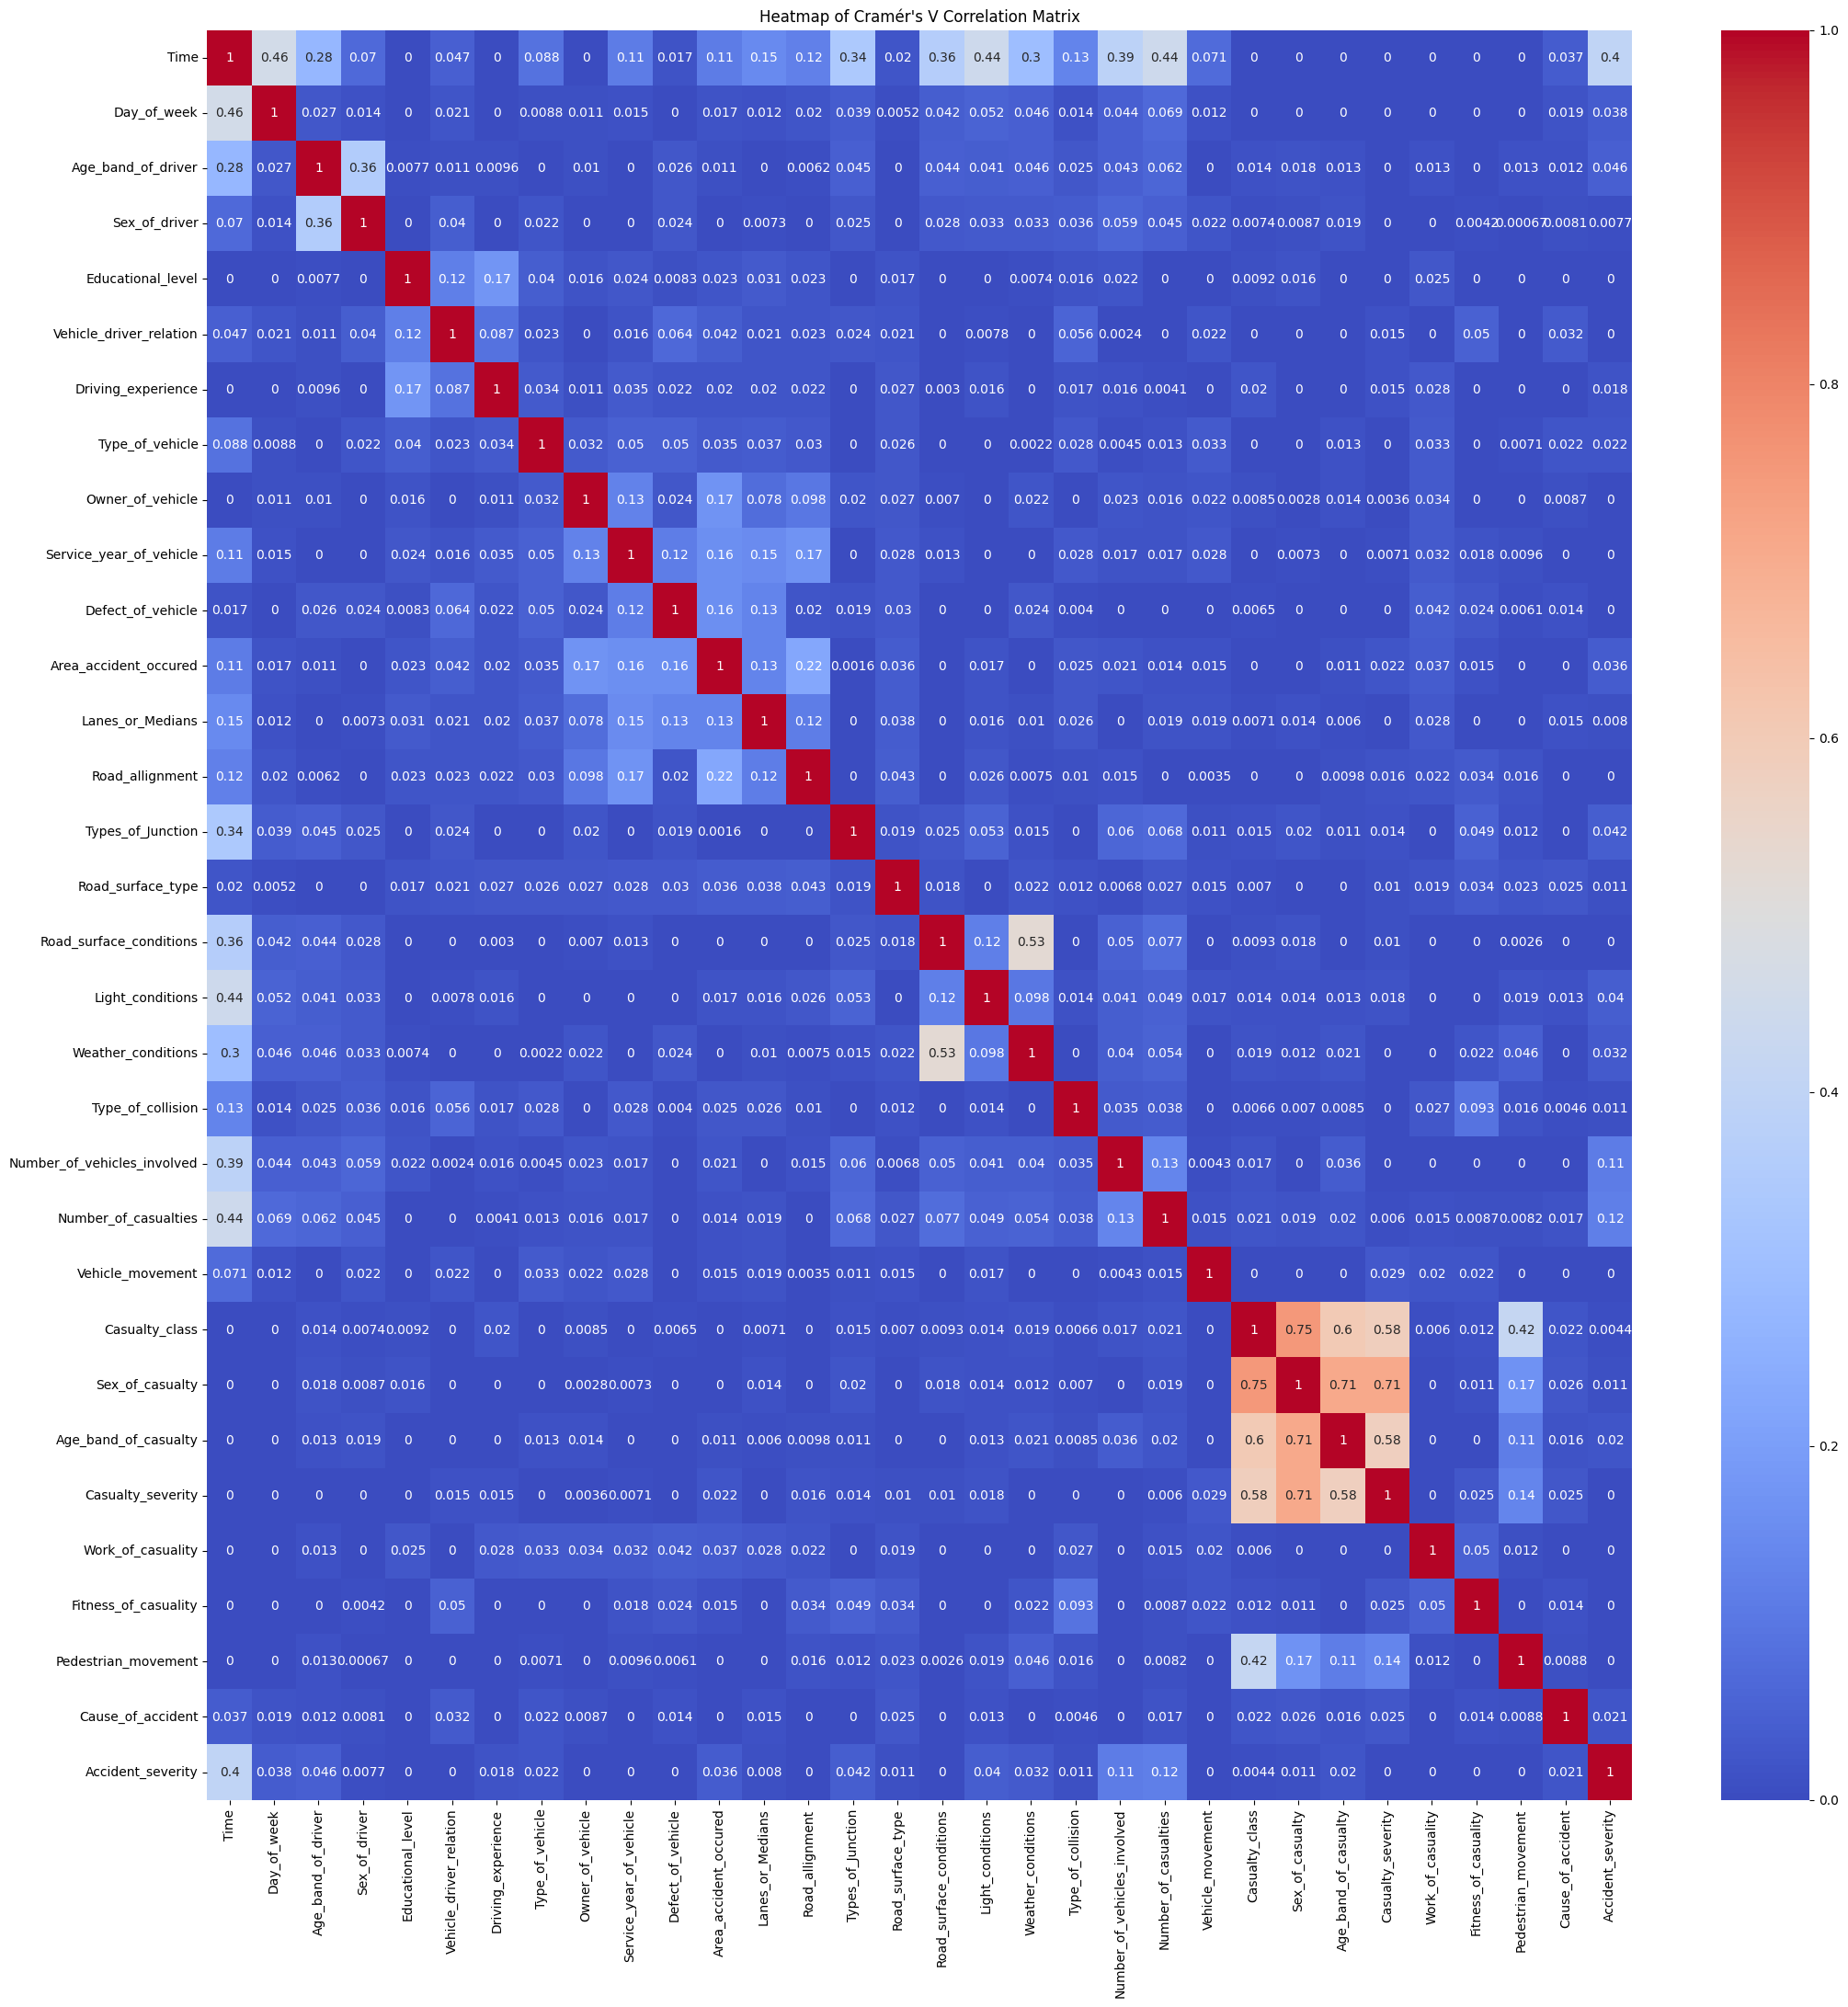

In [53]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

columns = df.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(25,25))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Heatmap of Cramér's V Correlation Matrix")
plt.show()

In [54]:
# Đặt ngưỡng
threshold = 0.6

# Lấy ra các cặp cột có độ tương quan lớn hơn ngưỡng
high_corr_pairs = []

# Lấy ra các giá trị trong ma trận tương quan
for i in range(len(cramers_v_matrix.columns)):
    for j in range(i):
        if abs(cramers_v_matrix.iloc[i, j]) > threshold:
            colname1 = cramers_v_matrix.columns[i]
            colname2 = cramers_v_matrix.columns[j]
            corr_value = cramers_v_matrix.iloc[i, j]
            high_corr_pairs.append((colname1, colname2, corr_value))

# Hiển thị các cặp cột
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]} correlation: {pair[2]}")


Sex_of_casualty - Casualty_class correlation: 0.7508702798262209
Age_band_of_casualty - Casualty_class correlation: 0.602117864467897
Age_band_of_casualty - Sex_of_casualty correlation: 0.7104185628191326
Casualty_severity - Sex_of_casualty correlation: 0.7075328333788486


In [55]:
# Xóa các cột trên
df = df.drop(['Sex_of_casualty', 'Casualty_class',
              'Age_band_of_casualty', 'Casualty_severity'], axis = 1)

In [56]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Normal,Collision with roadside-parked vehicles,2,2,Going straight,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Normal,Vehicle with vehicle collision,2,2,Going straight,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Normal,Collision with roadside objects,2,2,Going straight,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Normal,Vehicle with vehicle collision,2,2,Going straight,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Normal,Vehicle with vehicle collision,2,1,Other,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Normal,Vehicle with vehicle collision,1,1,Other,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Normal,Vehicle with vehicle collision,2,1,Other,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [57]:
# Xóa các cột không liên quan
df = df.drop(['Time', 'Day_of_week', 'Number_of_vehicles_involved', 'Number_of_casualties'], axis = 1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        11575 non-null  object
 3   Vehicle_driver_relation  11737 non-null  object
 4   Driving_experience       11487 non-null  object
 5   Type_of_vehicle          11366 non-null  object
 6   Owner_of_vehicle         11834 non-null  object
 7   Service_year_of_vehicle  8388 non-null   object
 8   Defect_of_vehicle        7889 non-null   object
 9   Area_accident_occured    12077 non-null  object
 10  Lanes_or_Medians         11931 non-null  object
 11  Road_allignment          12174 non-null  object
 12  Types_of_Junction        11429 non-null  object
 13  Road_surface_type        12144 non-null  object
 14  Road_surface_conditions  12316 non-nul

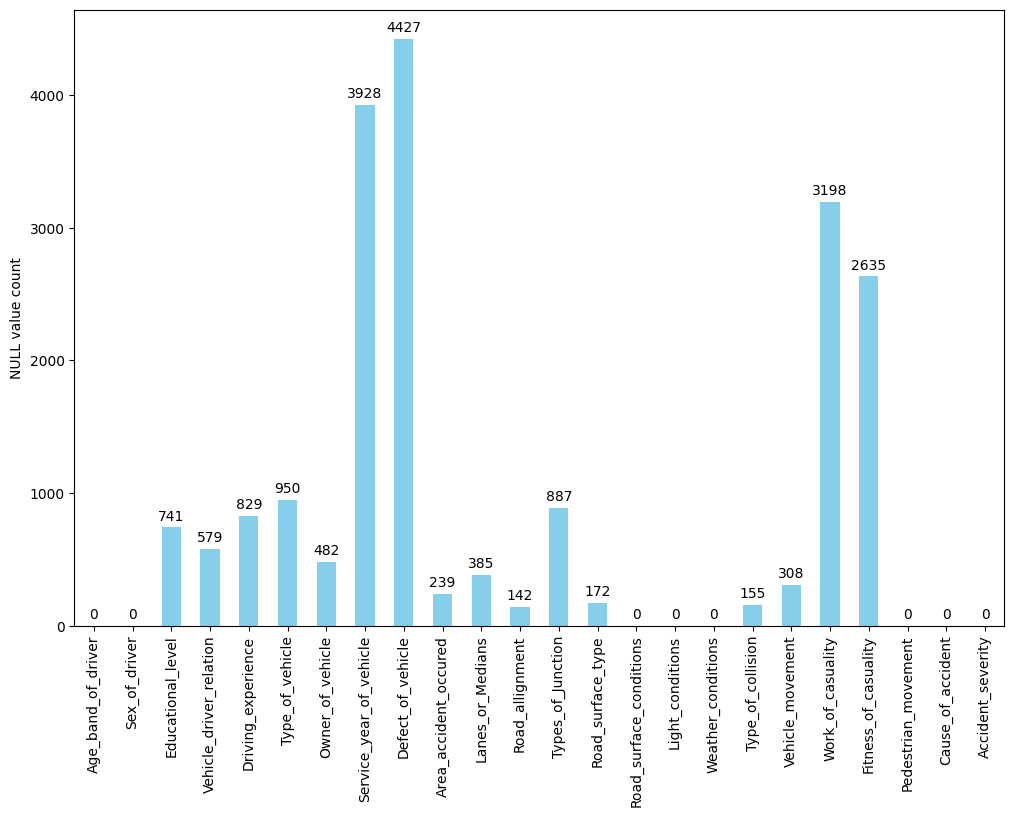

In [59]:
# biểu diễn số lượng giá trị null của các cột
# Đếm số lượng giá trị null trong từng cột
null_counts = df.isnull().sum()

# Biểu diễn số lượng giá trị null bằng biểu đồ
plt.figure(figsize=(12, 8))
bars = null_counts.plot(kind='bar', color='skyblue')
plt.ylabel('NULL value count')
plt.xticks(rotation=90)

# Thêm các số chỉ trên đầu các cột và căn giữa
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

plt.show()

In [60]:
# Xóa các cột có nhiều NULL
df = df.drop(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality'], axis = 1)

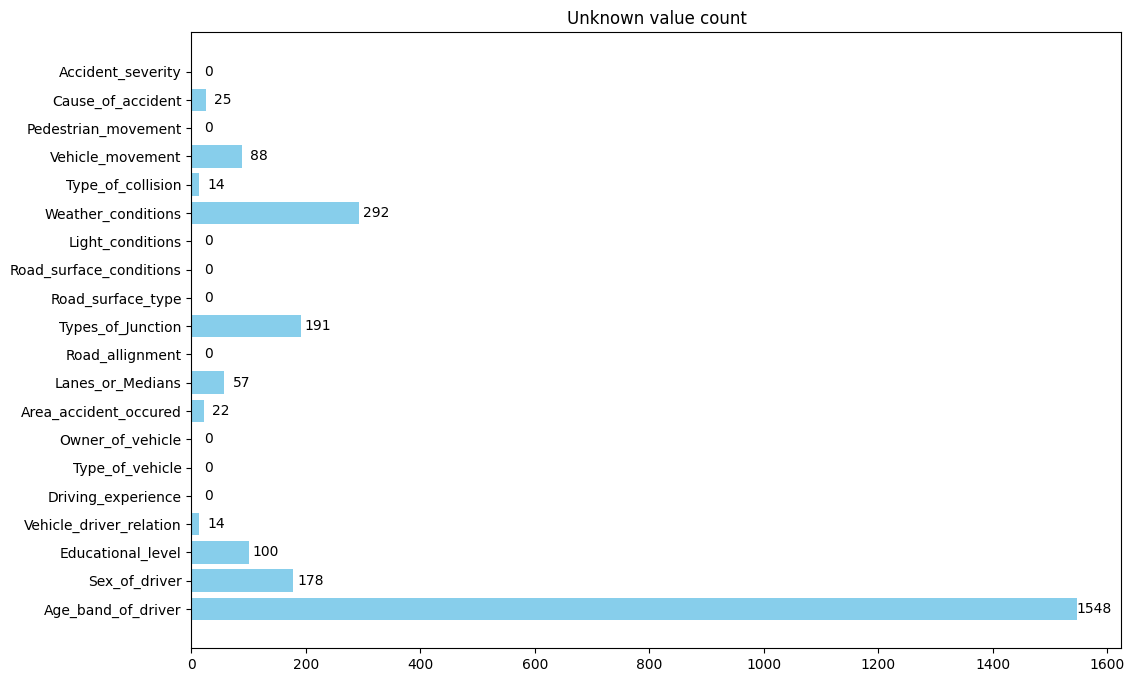

In [61]:
# biểu diễn số lượng giá trị Unknown, Other của các cột
Unknown = []

for column in df.columns:
    count = (df[column] == 'Unknown').sum()
    Unknown.append(count)

columns = df.columns.to_list()
    
plt.figure(figsize=(12, 8))
bars = plt.barh(columns, Unknown, color='skyblue')
plt.title('Unknown value count')

# Thêm các số chỉ trên đầu các cột và căn giữa
for bar in bars:
    width = bar.get_width()
    plt.text(width + 30, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
             ha='center', va='center')

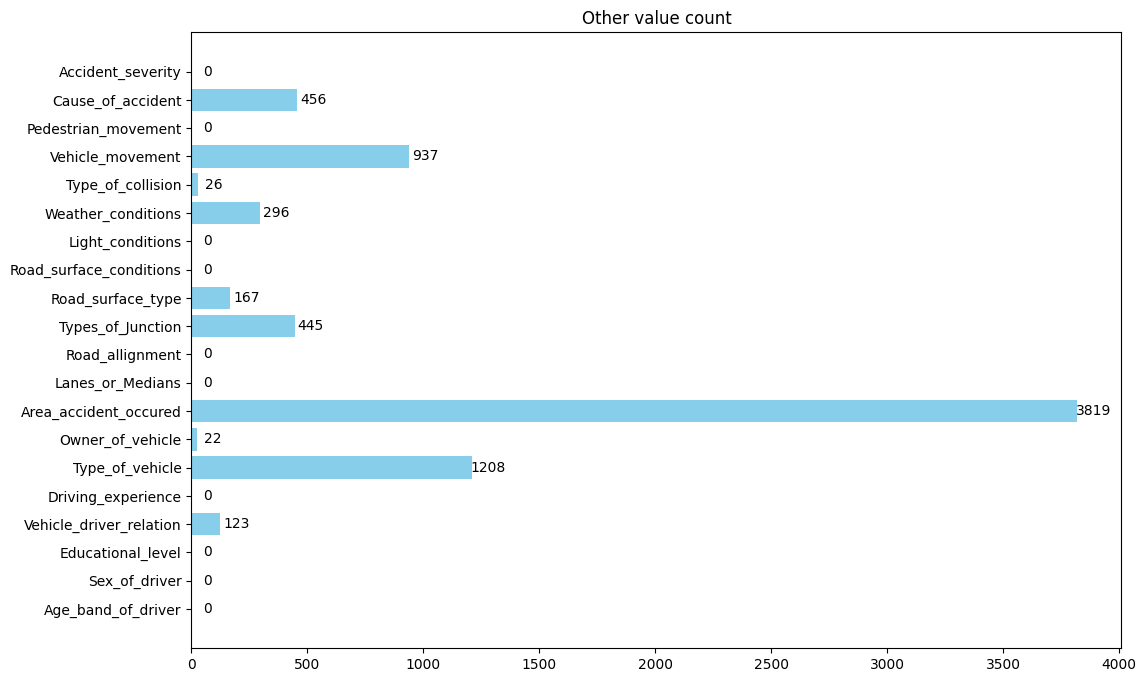

In [62]:
# biểu diễn số lượng giá trị Unknown, Other của các cột
Other = []

for column in df.columns:
    count = (df[column] == 'Other').sum()
    Other.append(count)

columns = df.columns.to_list()
    
plt.figure(figsize=(12, 8))
bars = plt.barh(columns, Other, color='skyblue')
plt.title('Other value count')

# Thêm các số chỉ trên đầu các cột và căn giữa
for bar in bars:
    width = bar.get_width()
    plt.text(width + 70, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
             ha='center', va='center')

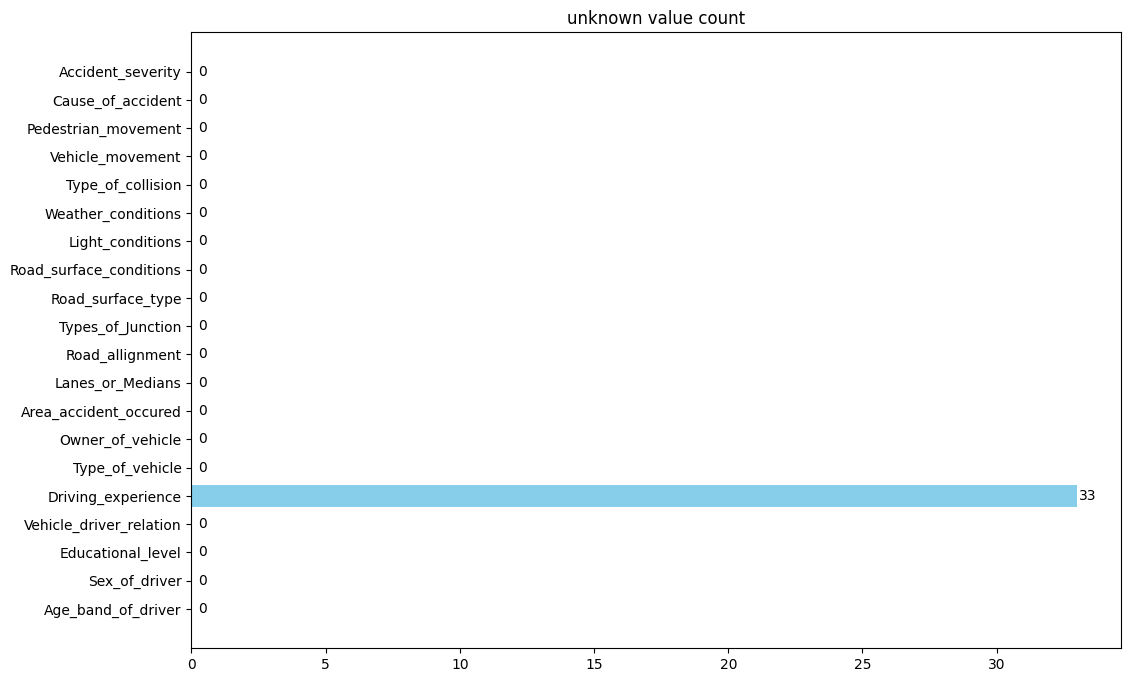

In [63]:
# biểu diễn số lượng giá trị Unknown, Other của các cột
unknown = []

for column in df.columns:
    count = (df[column] == 'unknown').sum()
    unknown.append(count)

columns = df.columns.to_list()
    
plt.figure(figsize=(12, 8))
bars = plt.barh(columns, unknown, color='skyblue')
plt.title('unknown value count')

# Thêm các số chỉ trên đầu các cột và căn giữa
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.4, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
             ha='center', va='center')

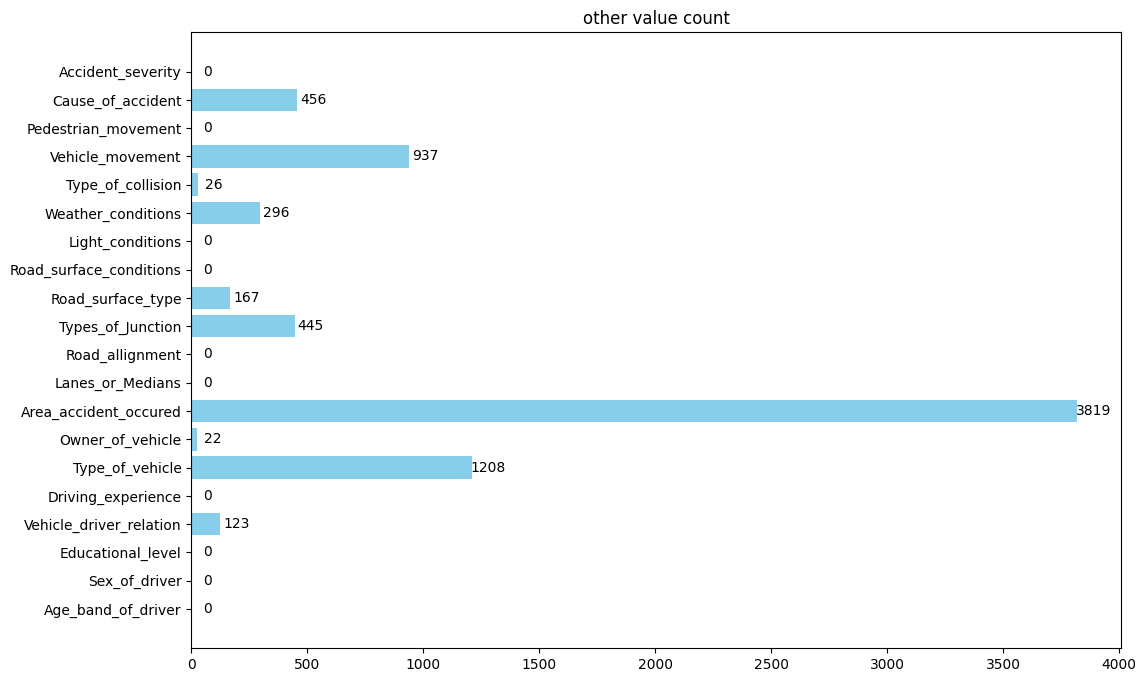

In [64]:
# biểu diễn số lượng giá trị Unknown, Other của các cột
other = []

for column in df.columns:
    count = (df[column] == 'other').sum()
    other.append(count)

columns = df.columns.to_list()
    
plt.figure(figsize=(12, 8))
bars = plt.barh(columns, Other, color='skyblue')
plt.title('other value count')

# Thêm các số chỉ trên đầu các cột và căn giữa
for bar in bars:
    width = bar.get_width()
    plt.text(width + 70, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
             ha='center', va='center')

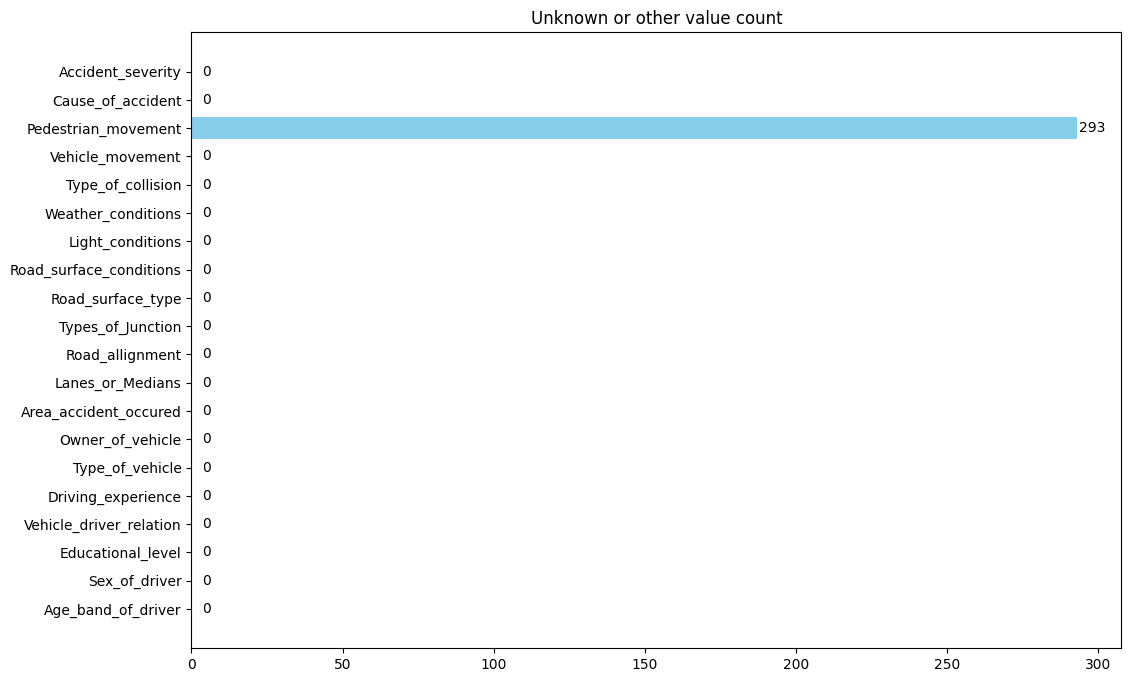

In [65]:
# biểu diễn số lượng giá trị Unknown, Other của các cột
Unknown_or_other = []

for column in df.columns:
    count = (df[column] == 'Unknown or other').sum()
    Unknown_or_other.append(count)

columns = df.columns.to_list()
    
plt.figure(figsize=(12, 8))
bars = plt.barh(columns, Unknown_or_other, color='skyblue')
plt.title('Unknown or other value count')

# Thêm các số chỉ trên đầu các cột và căn giữa
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
             ha='center', va='center')

In [66]:
# Xóa các data NULL
df = df.replace('Unknown', None)
df = df.replace('Other', None)
df = df.replace('unknown', None)
df = df.replace('other', None)
df = df.replace('Unknown or other', None)

df = df.dropna()
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
1,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury
9,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,U-Turn,Not a Pedestrian,Moving Backward,Serious Injury
11,31-50,Male,Above high school,Employee,No Licence,Automobile,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Earth roads,Dry,Daylight,Normal,Collision with animals,Going straight,Not a Pedestrian,No priority to pedestrian,Serious Injury
12,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,Office areas,Double carriageway (median),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with animals,Going straight,Not a Pedestrian,No distancing,Slight Injury
14,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Office areas,Undivided Two way,Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with animals,Going straight,Not a Pedestrian,No distancing,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12273,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Office areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury
12281,18-30,Male,Elementary school,Employee,Above 10yr,Lorry (41?100Q),Owner,Hospital areas,One way,Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,Moving Backward,Slight Injury
12290,Over 51,Male,Above high school,Owner,2-5yr,Public (12 seats),Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Reversing,Not a Pedestrian,Changing lane to the right,Slight Injury
12297,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Driving carelessly,Slight Injury


In [80]:
# Xác định cột không muốn áp dụng one-hot encoding
exclude_column = 'Accident_severity'

# Lấy danh sách tất cả các cột phân loại
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Loại bỏ cột không muốn áp dụng one-hot encoding
categorical_columns.remove(exclude_column)

# Áp dụng one-hot encoding cho các cột phân loại trừ cột `exclude_column`
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype = int)
df_encoded

,Accident_severity,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Sex_of_driver_Female,Sex_of_driver_Male,Educational_level_Above high school,Educational_level_Elementary school,Educational_level_High school,...,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
1,Slight Injury,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,Serious Injury,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,Serious Injury,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
12,Slight Injury,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,Serious Injury,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12273,Slight Injury,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12281,Slight Injury,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
12290,Slight Injury,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12297,Slight Injury,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Chia dữ liệu train-test
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [85]:
y_val.info()

<class 'pandas.core.series.Series'>
Index: 278 entries, 6884 to 11657
Series name: Accident_severity
Non-Null Count  Dtype 
--------------  ----- 
278 non-null    object
dtypes: object(1)
memory usage: 4.3+ KB


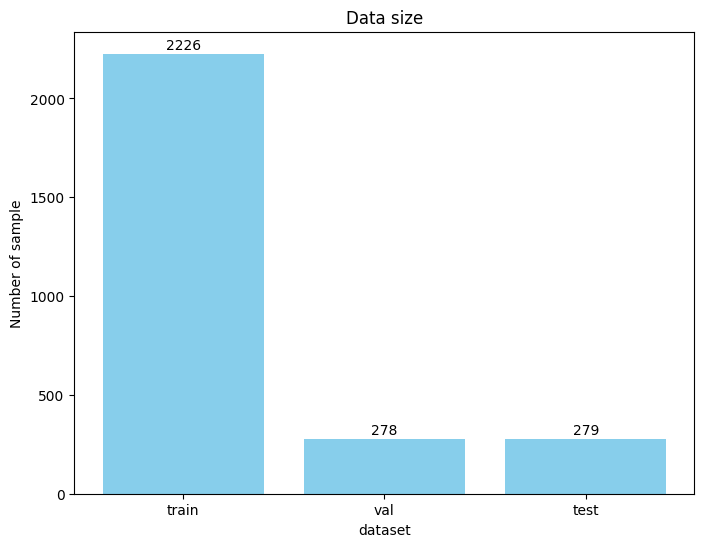

In [87]:
# biểu diễn kích thước tập train val test
data_size = {'train': 2226,
            'val': 278,
            'test': 279}

plt.figure(figsize=(8, 6))
bars = plt.bar(data_size.keys(), data_size.values(), color='skyblue')
plt.title('Data size')
plt.xlabel('dataset')
plt.ylabel('Number of sample')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), va='bottom', ha='center')

plt.show()

In [88]:
print(y_train.value_counts())

Accident_severity
Slight Injury     1867
Serious Injury     324
Fatal injury        35
Name: count, dtype: int64


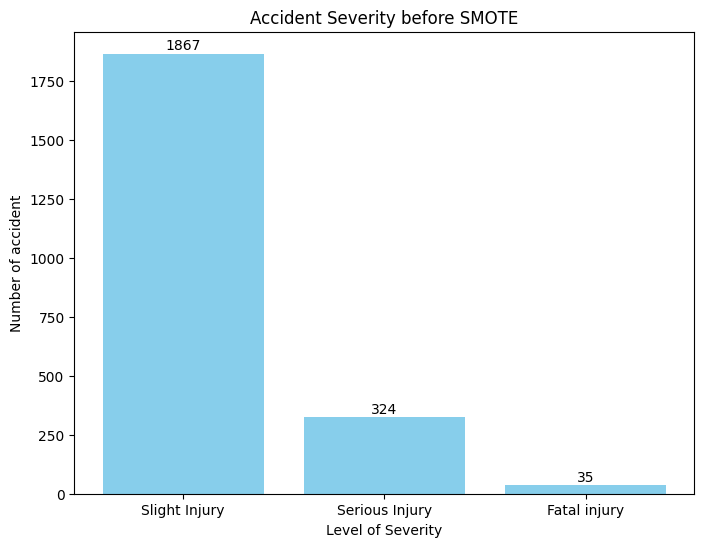

In [89]:
# biểu diễn số lượng lớp trước khi cân bằng
severity_counts = {
    'Slight Injury': 1867,
    'Serious Injury': 324,
    'Fatal injury': 35
}

plt.figure(figsize=(8, 6))
bars = plt.bar(severity_counts.keys(), severity_counts.values(), color='skyblue')
plt.title('Accident Severity before SMOTE')
plt.xlabel('Level of Severity')
plt.ylabel('Number of accident')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), va='bottom', ha='center')

plt.show()

In [103]:
# cân bằng data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

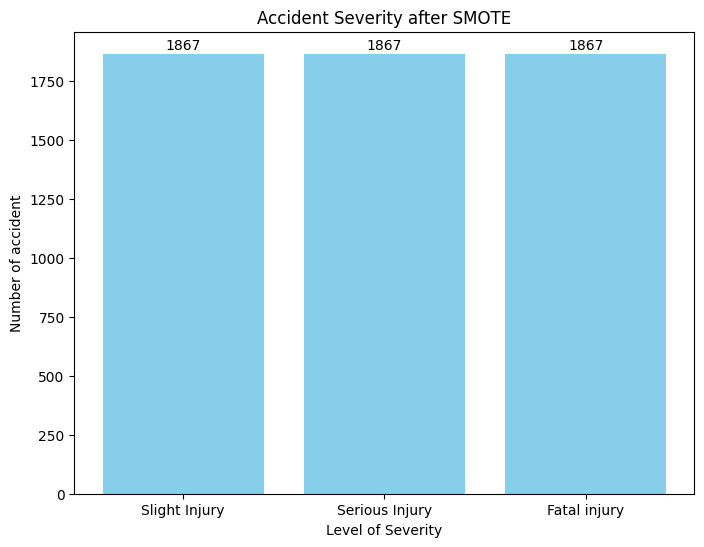

In [104]:
# biểu diễn số lượng lớp sau khi cân bằng
severity_counts = {
    'Slight Injury': 1867,
    'Serious Injury': 1867,
    'Fatal injury': 1867
}

plt.figure(figsize=(8, 6))
bars = plt.bar(severity_counts.keys(), severity_counts.values(), color='skyblue')
plt.title('Accident Severity after SMOTE')
plt.xlabel('Level of Severity')
plt.ylabel('Number of accident')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), va='bottom', ha='center')

plt.show()

# Phân Tích Dữ Liệu

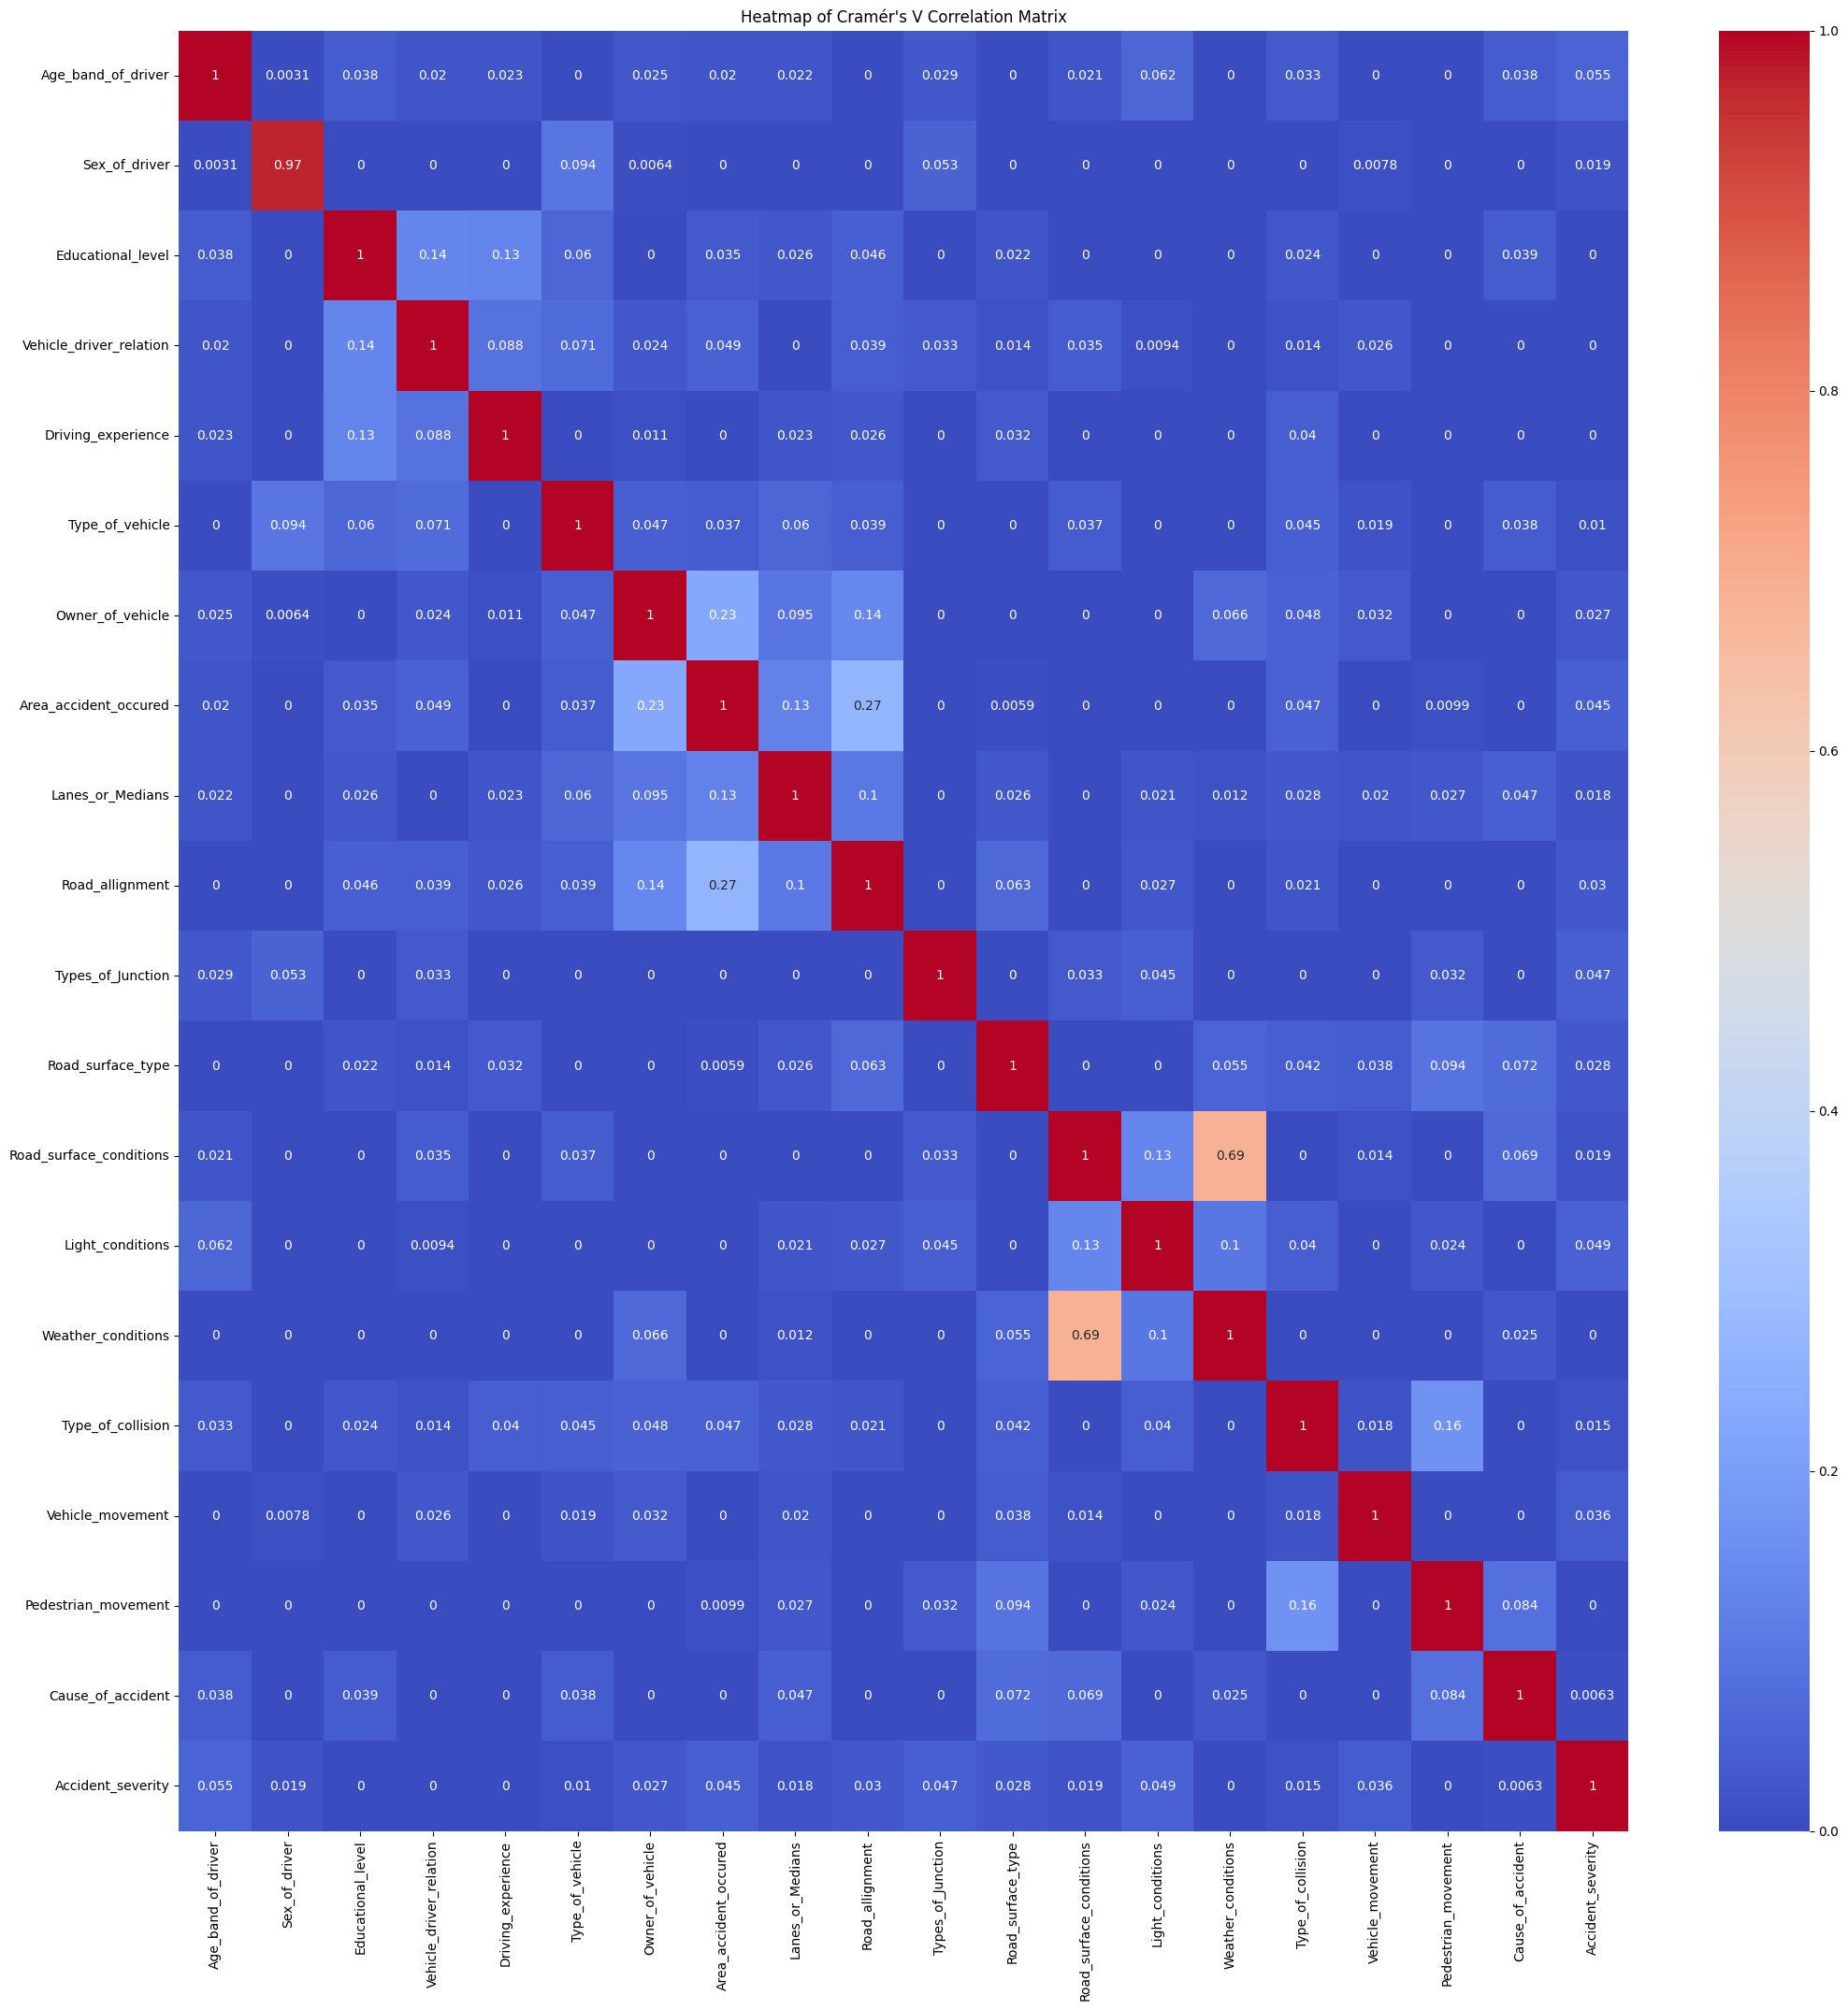

In [94]:
# tuong quan cac truong data
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

columns = df.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(25,25))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Heatmap of Cramér's V Correlation Matrix")
plt.show()

In [95]:
# Đặt ngưỡng
threshold = 0.5

# Lấy ra các cặp cột có độ tương quan lớn hơn ngưỡng
high_corr_pairs = []

# Lấy ra các giá trị trong ma trận tương quan
for i in range(len(cramers_v_matrix.columns)):
    for j in range(i):
        if abs(cramers_v_matrix.iloc[i, j]) > threshold:
            colname1 = cramers_v_matrix.columns[i]
            colname2 = cramers_v_matrix.columns[j]
            corr_value = cramers_v_matrix.iloc[i, j]
            high_corr_pairs.append((colname1, colname2, corr_value))

# Hiển thị các cặp cột
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]} correlation: {pair[2]}")


Weather_conditions - Road_surface_conditions correlation: 0.6861800939901225


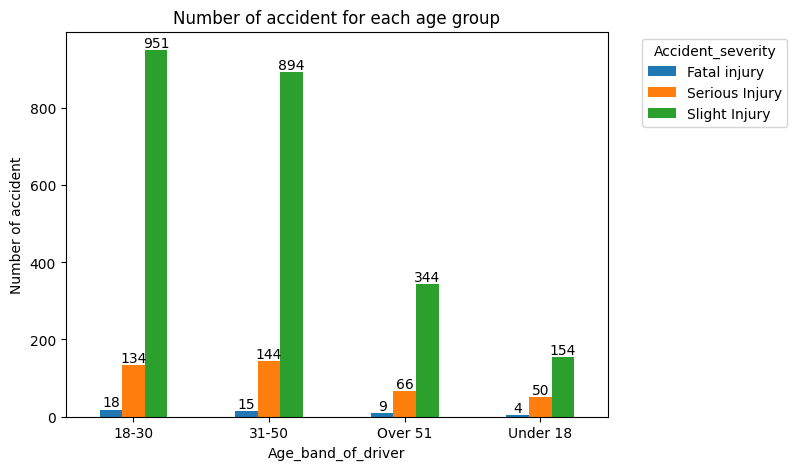

In [96]:
# mức độ - nhóm tuổi
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Age_band_of_driver = df['Age_band_of_driver'].tolist()
Accident_severity = df['Accident_severity'].tolist()

# Tạo cross-tabulation matrix
cross_tab = pd.crosstab(Age_band_of_driver, Accident_severity)

ax = cross_tab.plot(kind='bar', figsize=(7, 5))

plt.title('Number of accident for each age group')
plt.xlabel('Age_band_of_driver')
plt.ylabel('Number of accident')
plt.xticks(rotation=0)  # Xoay nhãn trục x cho dễ đọc
plt.legend(title='Accident_severity', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Tọa độ giữa cột
        ha='center', va='center', 
        xytext=(0, 5),  # Dịch chuyển vị trí chú thích lên trên 5 điểm
        textcoords='offset points'
    )

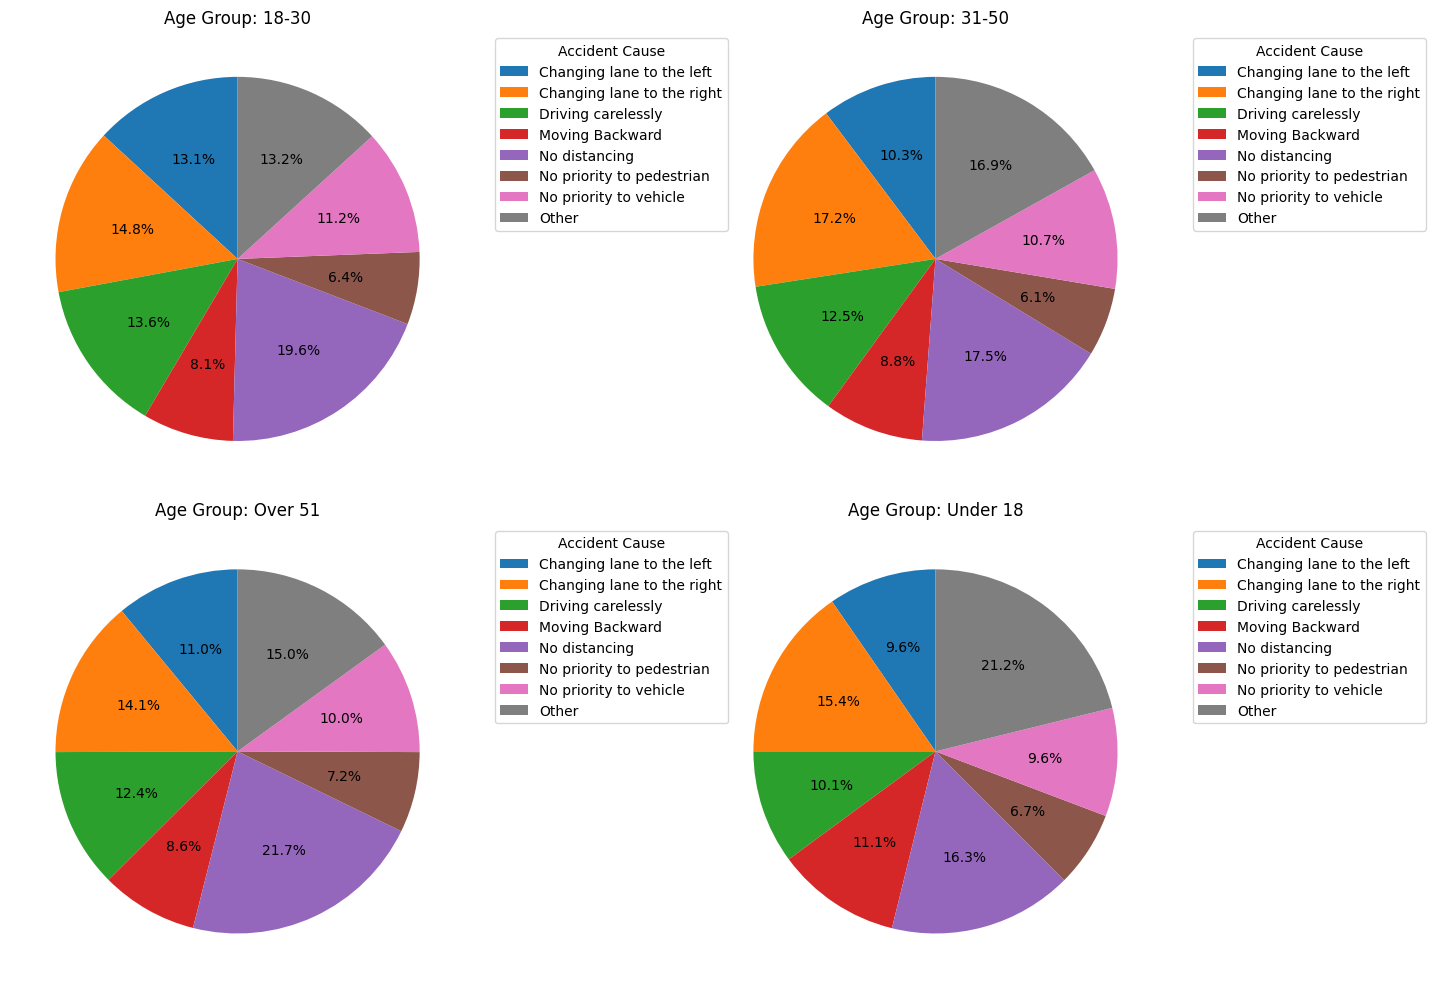

In [97]:
# tỉ lệ giữa các nguyên nhân gây tai nạn ở các nhóm tuổi

Age_band_of_driver = df['Age_band_of_driver'].tolist()
Cause_of_accident = df['Cause_of_accident'].tolist()

# Tạo cross-tabulation matrix
cross_tab = pd.crosstab(Age_band_of_driver, Cause_of_accident)

cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

threshold = 0.05

# Hàm để nhóm các phần nhỏ
def group_small_categories(series, threshold):
    large_categories = series[series >= threshold]
    small_categories = series[series < threshold]
    large_categories['Other'] = small_categories.sum()
    return large_categories

# Vẽ biểu đồ tròn cho từng nhóm tuổi
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Điều chỉnh số hàng và cột cho phù hợp
axs = axs.flatten()

for i, age_group in enumerate(cross_tab.index):
    ax = axs[i]
    data = cross_tab_percentage.loc[age_group]
    data = group_small_categories(data, threshold)
    wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Age Group: {age_group}')
    ax.legend(wedges, data.index, title='Accident Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylabel('')

# Loại bỏ các trục thừa
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

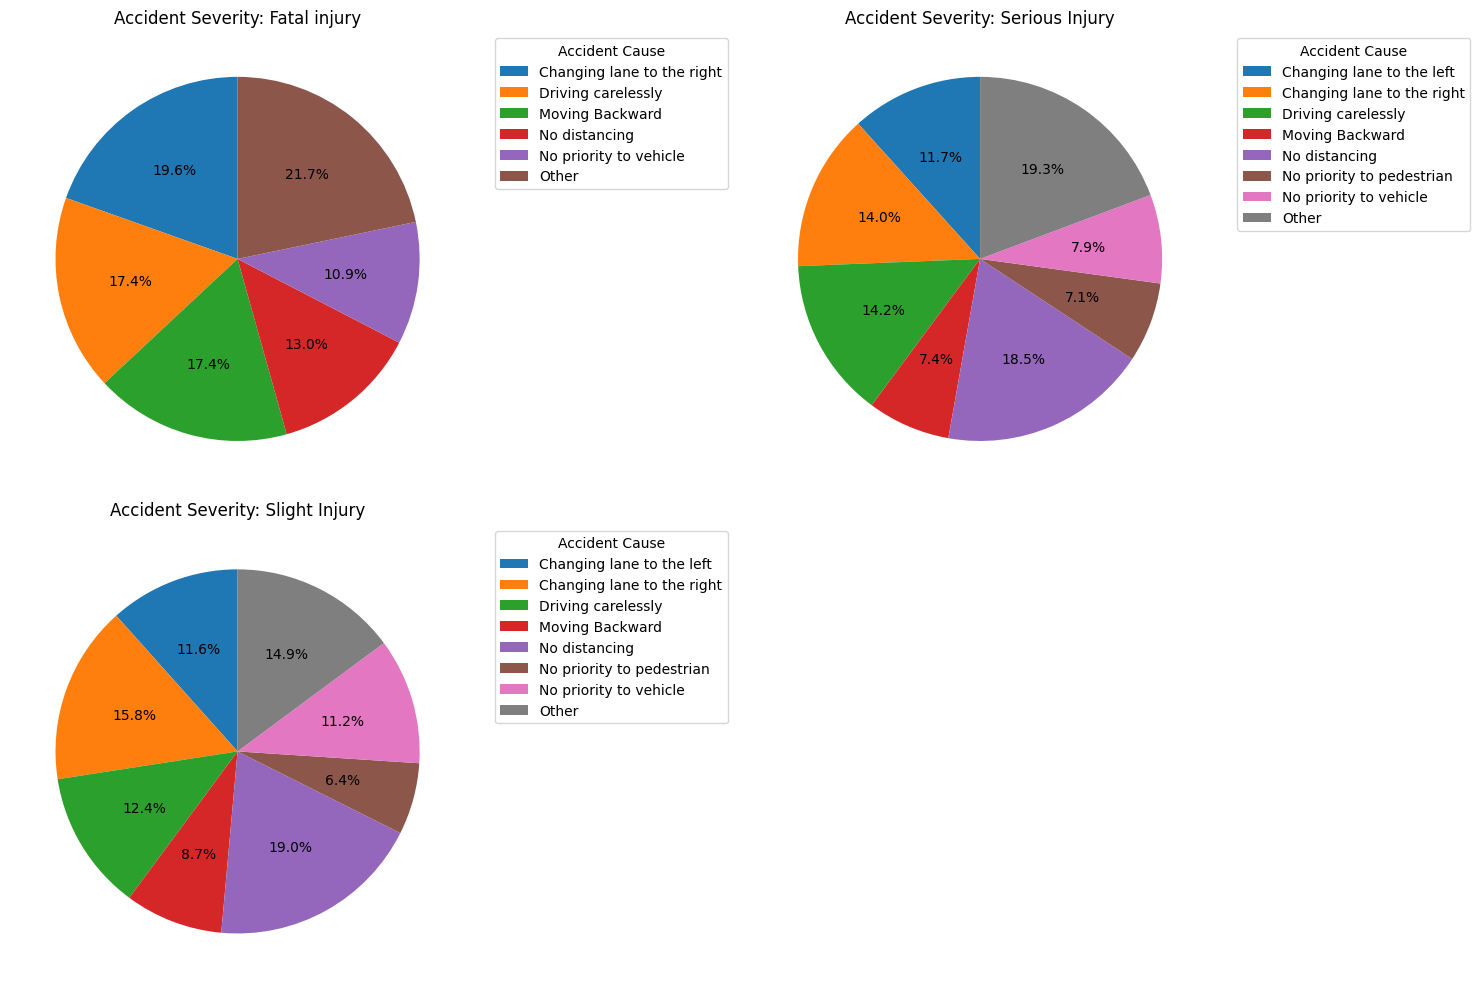

In [108]:
# nguyen nhan - muc do

Accident_severity = df['Accident_severity'].tolist()
Cause_of_accident = df['Cause_of_accident'].tolist()

# Tạo cross-tabulation matrix
cross_tab = pd.crosstab(Accident_severity, Cause_of_accident)

cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

threshold = 0.05

# Hàm để nhóm các phần nhỏ
def group_small_categories(series, threshold):
    large_categories = series[series >= threshold]
    small_categories = series[series < threshold]
    large_categories['Other'] = small_categories.sum()
    return large_categories

# Vẽ biểu đồ tròn cho từng nhóm tuổi
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Điều chỉnh số hàng và cột cho phù hợp
axs = axs.flatten()

for i, lv in enumerate(cross_tab.index):
    ax = axs[i]
    data = cross_tab_percentage.loc[lv]
    data = group_small_categories(data, threshold)
    wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Accident Severity: {lv}')
    ax.legend(wedges, data.index, title='Accident Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylabel('')

# Loại bỏ các trục thừa
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

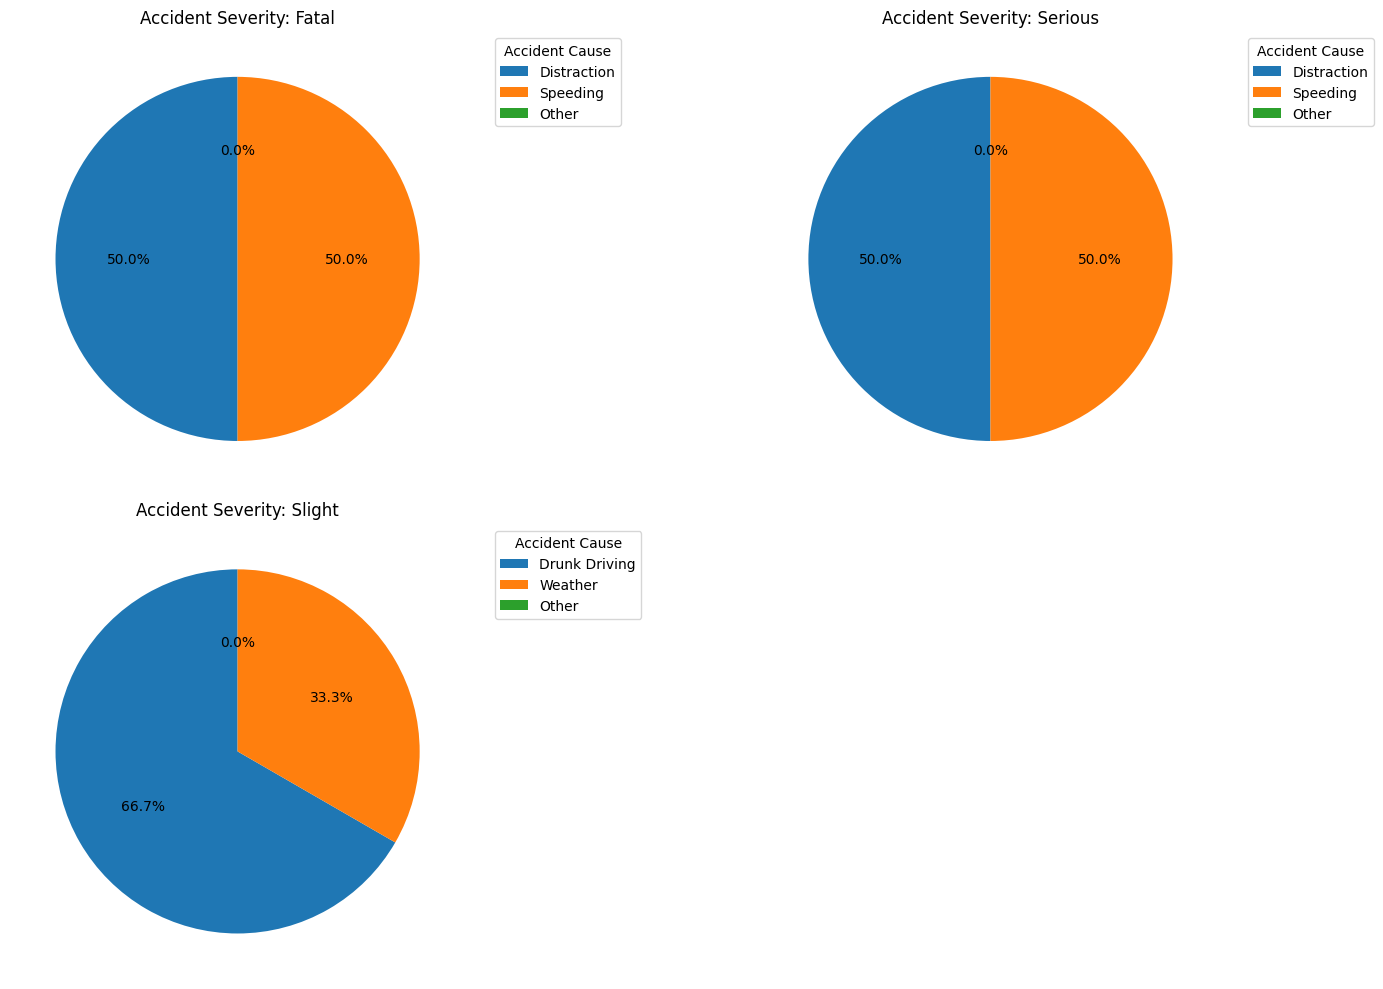

In [112]:
# nguyen nhan - muc do

Accident_severity = df['Accident_severity'].tolist()
Cause_of_accident = df['Cause_of_accident'].tolist()

# Tạo cross-tabulation matrix
cross_tab = pd.crosstab(Accident_severity, Cause_of_accident)

cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

threshold = 0.05

# Hàm để nhóm các phần nhỏ
def group_small_categories(series, threshold):
    large_categories = series[series >= threshold]
    small_categories = series[series < threshold]
    large_categories['Other'] = small_categories.sum()
    return large_categories

# Vẽ biểu đồ tròn cho từng nhóm tuổi
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Điều chỉnh số hàng và cột cho phù hợp
axs = axs.flatten()

for i, lv in enumerate(cross_tab.index):
    ax = axs[i]
    data = cross_tab_percentage.loc[lv]
    data = group_small_categories(data, threshold)
    wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Accident Severity: {lv}')
    ax.legend(wedges, data.index, title='Accident Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylabel('')

# Loại bỏ các trục thừa
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

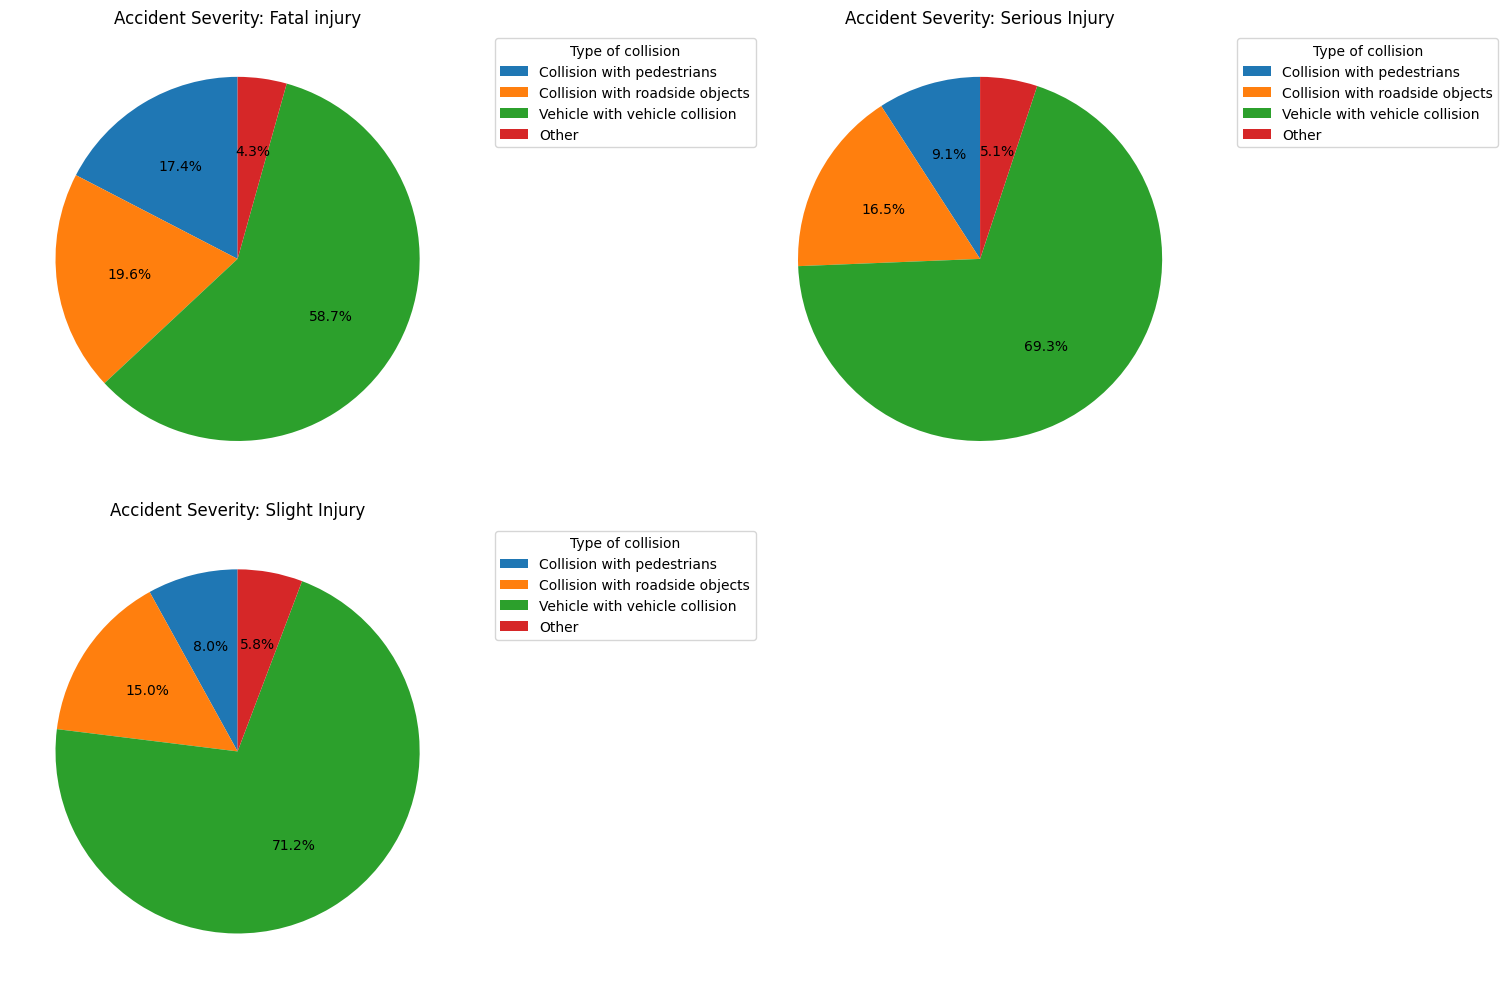

In [99]:
# type - level

Accident_severity = df['Accident_severity'].tolist()
Type_of_collision = df['Type_of_collision'].tolist()

# Tạo cross-tabulation matrix
cross_tab = pd.crosstab(Accident_severity, Type_of_collision)

cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

threshold = 0.05

# Hàm để nhóm các phần nhỏ
def group_small_categories(series, threshold):
    large_categories = series[series >= threshold]
    small_categories = series[series < threshold]
    large_categories['Other'] = small_categories.sum()
    return large_categories

# Vẽ biểu đồ tròn cho từng nhóm tuổi
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Điều chỉnh số hàng và cột cho phù hợp
axs = axs.flatten()

for i, lv in enumerate(cross_tab.index):
    ax = axs[i]
    data = cross_tab_percentage.loc[lv]
    data = group_small_categories(data, threshold)
    wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Accident Severity: {lv}')
    ax.legend(wedges, data.index, title='Type of collision', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylabel('')

# Loại bỏ các trục thừa
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

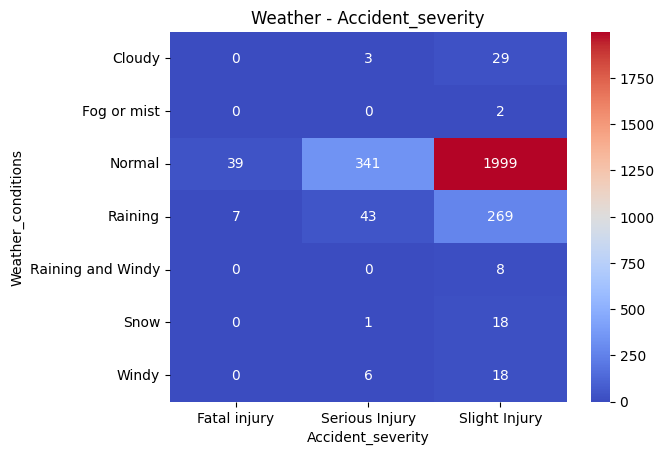

In [100]:
# thời tiết - mức độ

heatmap_data = pd.crosstab(df['Weather_conditions'], df['Accident_severity'])
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Weather - Accident_severity')

# Hiển thị biểu đồ
plt.show()

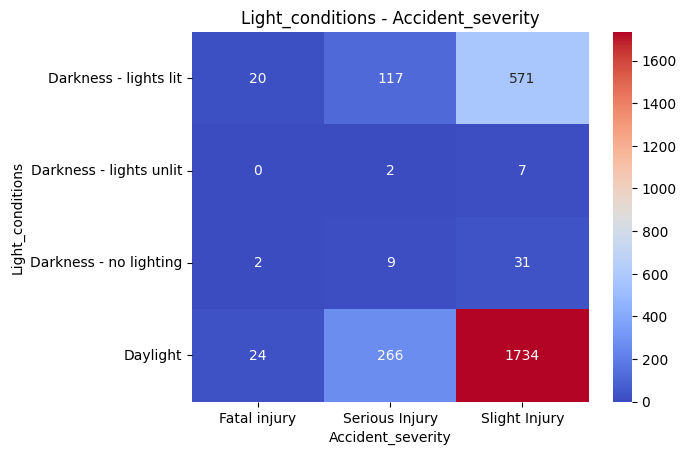

In [101]:
# ánh sáng - mức độ
heatmap_data = pd.crosstab(df['Light_conditions'], df['Accident_severity'])
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Light_conditions - Accident_severity')

# Hiển thị biểu đồ
plt.show()

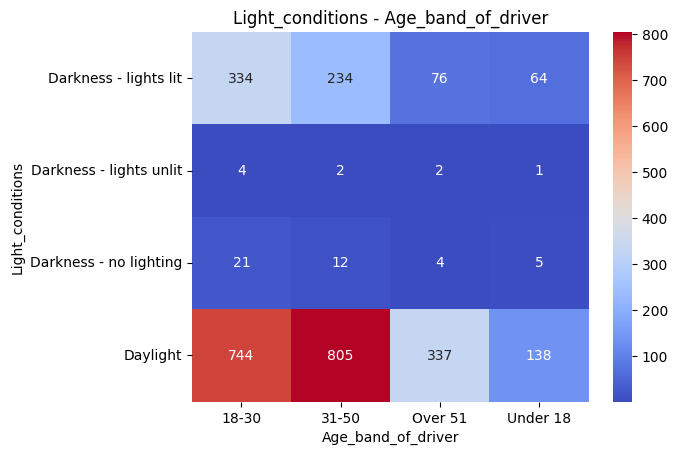

In [102]:
# ánh sáng - mức độ
heatmap_data = pd.crosstab(df['Light_conditions'], df['Age_band_of_driver'])
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Light_conditions - Age_band_of_driver')

# Hiển thị biểu đồ
plt.show()